In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


In [1]:
import pandas as pd
import seaborn as sns

 
train_dt = sns.load_dataset('titanic')
train_dt.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# 한글 사용 준비
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'   # macOS 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 기호 깨짐 방지

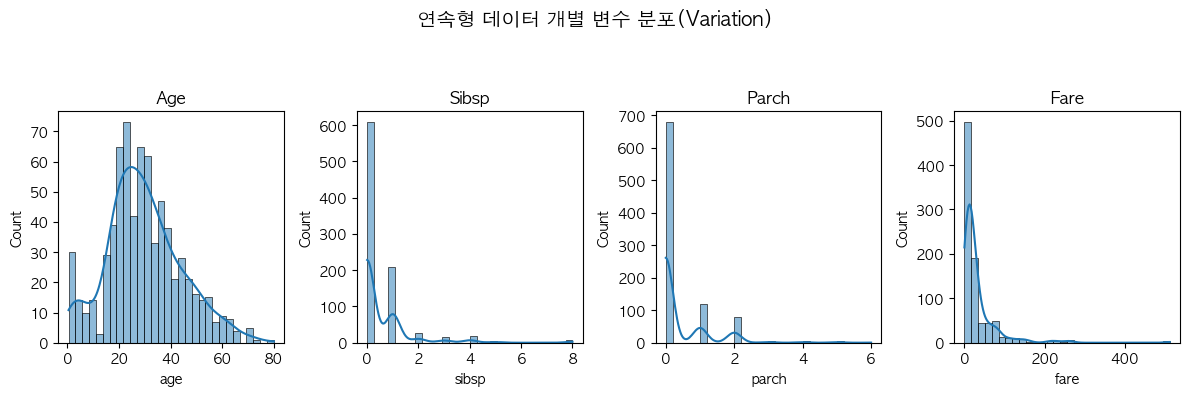

In [5]:
# 연속형 변수 선택
continuous_vars = ["age", "sibsp", "parch", "fare"]

# 그래프 스타일 설정
plt.figure(figsize=(12, 4))
plt.suptitle("연속형 데이터 개별 변수 분포(Variation)", fontsize=14, fontweight="bold")

# 각 변수에 대한 분포 플롯 생성
for i, var in enumerate(continuous_vars):
    plt.subplot(1, 4, i+1)
    sns.histplot(train_dt[var], bins=30, kde=True)
    plt.title(var.capitalize())
    plt.xlabel(var)
    plt.ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

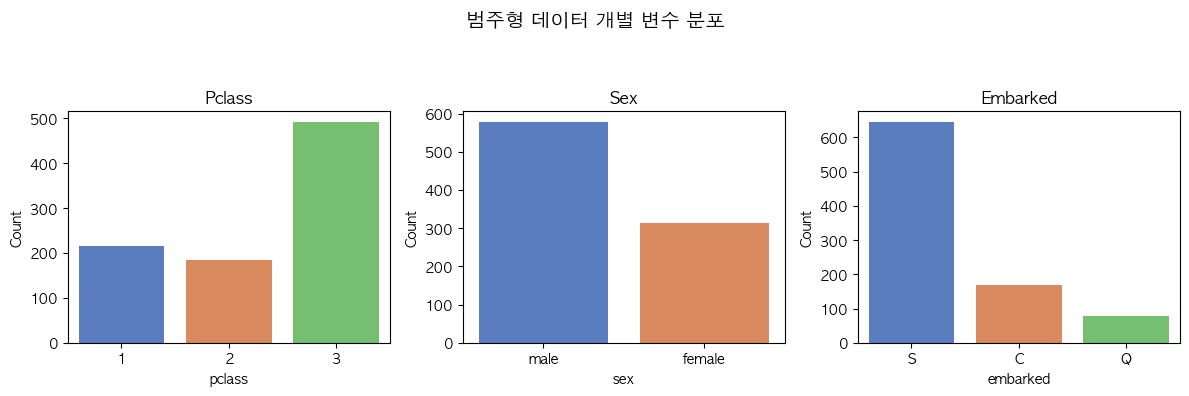

In [6]:
# 범주형 변수 선택
categorical_vars = ["pclass", "sex", "embarked"]

# 그래프 스타일 설정
plt.figure(figsize=(12, 4))
plt.suptitle("범주형 데이터 개별 변수 분포", fontsize=14, fontweight="bold")

# 각 변수에 대한 카운트 플롯 생성
for i, var in enumerate(categorical_vars):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=train_dt[var], palette="muted", hue=train_dt[var], legend=False)
    plt.title(var.capitalize())
    plt.xlabel(var)
    plt.ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

In [7]:
train_dt['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

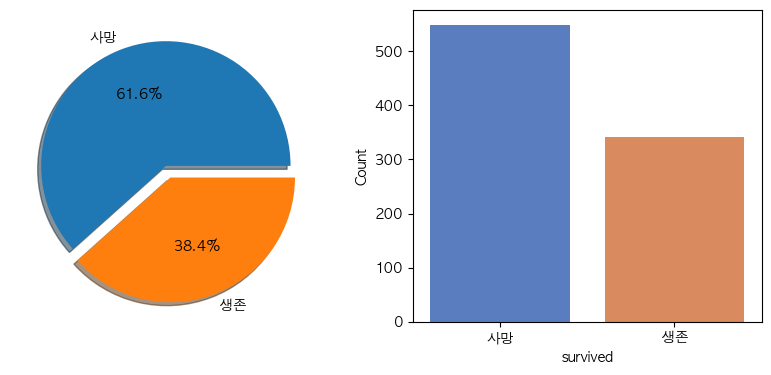

In [ ]:
train_dt_copy = train_dt.copy()
# Survived 변수 매핑 (0: 사망, 1: 생존)
train_dt_copy["survived"] = train_dt_copy["survived"].map({0: "사망", 1: "생존"})


# 생존자 및 사망자 수 계산
survived_counts = train_dt_copy["survived"].value_counts()
labels = survived_counts.index
sizes = survived_counts.values
colors = ["#1f77b4", "#ff7f0e"]
explode = [0, 0.1]  # 생존자 부분만 분리

# 그래프 설정
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 크기 조정
fig.suptitle("", fontsize=14, fontweight="bold")

# 파이 차트 (조각 분리)
axes[0].pie(
    sizes, labels=labels, autopct="%1.1f%%", 
    colors=colors, explode=explode, shadow=True
)
axes[0].set_title("")

# 바 차트
sns.barplot(x=labels, y=sizes, ax=axes[1], 
            palette="muted", hue=labels, legend=False)
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [10]:
train_dt['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

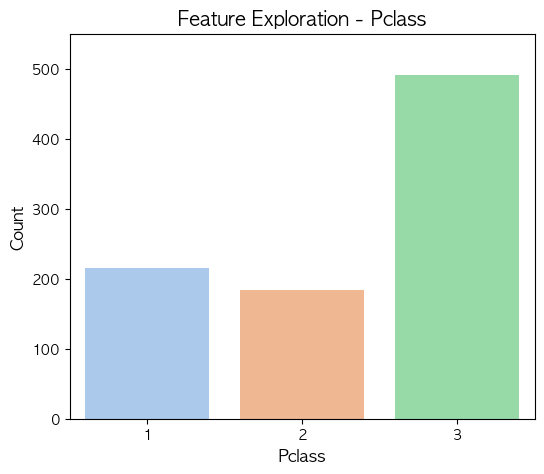

In [11]:
# 그래프 스타일 설정
plt.figure(figsize=(6, 5))

# 막대 그래프 생성
ax = sns.barplot(x=train_dt["pclass"].value_counts().index, 
                 y=train_dt["pclass"].value_counts().values, 
                 palette="pastel",  # 색상 설정
                 hue=train_dt["pclass"].value_counts().index,
                 legend=False) 

# 제목 설정
plt.title("Feature Exploration - Pclass", fontsize=14, fontweight="bold")
plt.xlabel("Pclass", fontsize=12)
plt.ylabel("Count", fontsize=12)

# y축 눈금 설정
plt.ylim(0, 550)

plt.show()

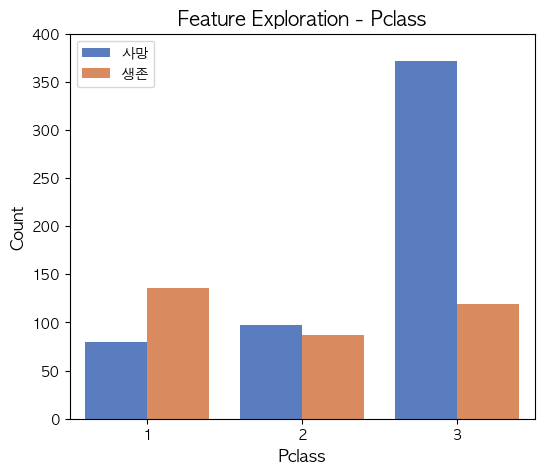

In [14]:
# 그래프 스타일 설정
plt.figure(figsize=(6, 5))
# sns.set(font="Malgun Gothic", rc={"axes.unicode_minus": False})  

# 막대 그래프 생성 (Pclass별 Survived 분포)
ax = sns.countplot(data=train_dt, x="pclass", hue="survived", palette="muted")

# 제목 및 축 설정
plt.title("Feature Exploration - Pclass", fontsize=14, fontweight="bold")
plt.xlabel("Pclass", fontsize=12)
plt.ylabel("Count", fontsize=12)

# 범례 설정
plt.legend(title="", labels=["사망", "생존"])

# y축 제한 설정
plt.ylim(0, 400)

plt.show()

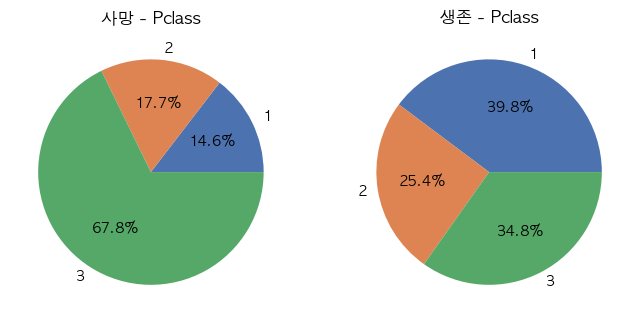

In [18]:
# 생존자와 사망자 그룹별 Pclass 비율 계산
dead_pclass = train_dt[train_dt["survived"] == 0]["pclass"].value_counts(normalize=True) * 100
survived_pclass = train_dt[train_dt["survived"] == 1]["pclass"].value_counts(normalize=True) * 100

# 파이 차트에 표시할 레이블 (Pclass 값)
labels = ["1", "2", "3"]
colors = ["#4c72b0", "#dd8452", "#55a868"]

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# 사망자 파이 차트
axes[0].pie(dead_pclass.sort_index(), labels=labels, autopct="%1.1f%%", colors=colors)
axes[0].set_title("사망 - Pclass")

# 생존자 파이 차트
axes[1].pie(survived_pclass.sort_index(), labels=labels, autopct="%1.1f%%", colors=colors)
axes[1].set_title("생존 - Pclass")

plt.show()

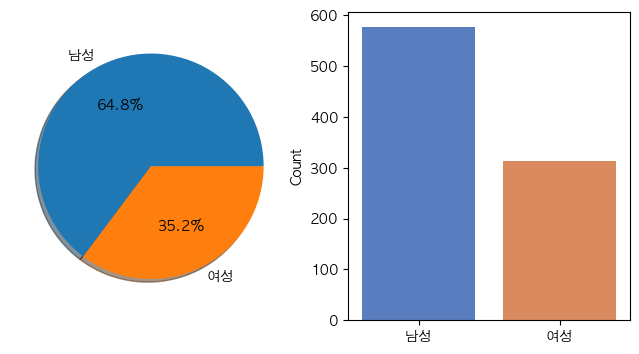

In [19]:
# 성별 분포 계산
sex_counts = train_dt["sex"].value_counts()
sex_percent = train_dt["sex"].value_counts(normalize=True) * 100

# 성별 한글 변환
labels = ["남성", "여성"]

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# 파이 차트
axes[0].pie(sex_percent, labels=labels, autopct="%1.1f%%", shadow=True) # autopct : 백분율 표시
axes[0].set_title("")

# 바 차트
sns.barplot(x=labels, y=sex_counts, ax=axes[1], palette="muted", hue=labels, legend=False)
axes[1].set_ylabel("Count")

plt.show()


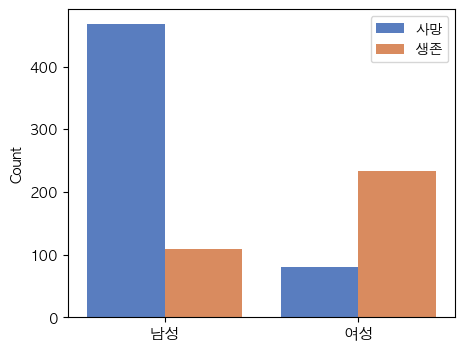

In [20]:
# 그래프 크기 설정
plt.figure(figsize=(5, 4))

# 성별에 따른 생존 여부 카운트 플롯
ax = sns.countplot(data=train_dt, x="sex", hue="survived", palette="muted")

# 한글 라벨 적용
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["남성", "여성"], fontsize=11)

# 범례 설정
plt.legend(title="", labels=["사망", "생존"], loc="upper right")

plt.show()

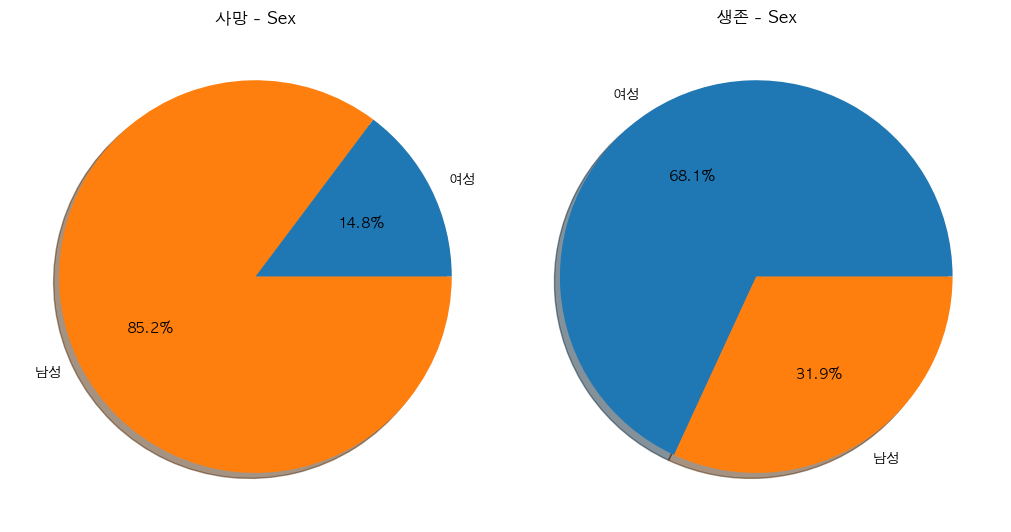

In [21]:
fig, ax = plt.subplots(1,2,figsize=(10,6), constrained_layout=True)
labels = ['여성', '남성']
 
# Survived 가 0인 데이터를 이용한 Pie Plot
train_dt[train_dt['survived'] == 0]['sex'].value_counts().sort_index().plot.pie(ax=ax[0], shadow=True, autopct='%1.1f%%', labels=labels)
ax[0].set(ylabel='', title='사망 - Sex')
 
# Survived 가 1인 데이터를 이용한 Pie Plot
train_dt[train_dt['survived'] == 1]['sex'].value_counts().sort_index().plot.pie(ax=ax[1], shadow=True, autopct='%1.1f%%', labels=labels)
ax[1].set(ylabel='', title='생존 - Sex')
 
plt.show()

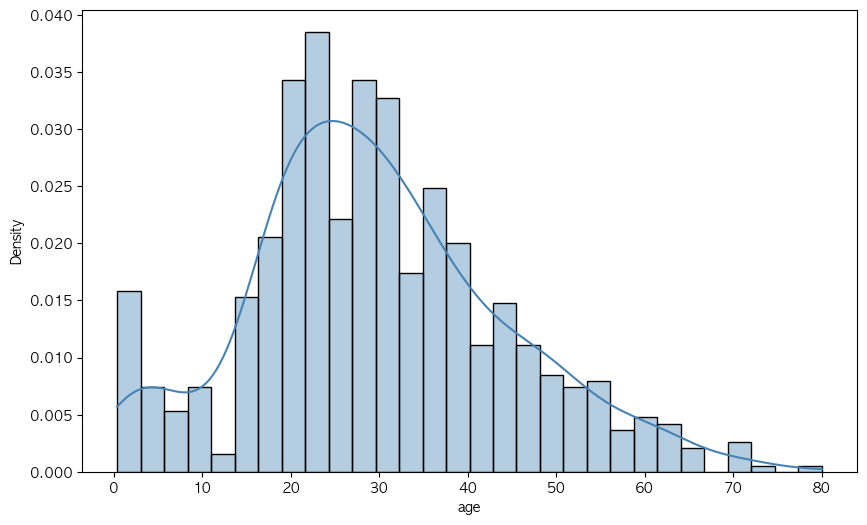

In [22]:
# 나이별 분포 확인
fig, ax = plt.subplots(figsize=(10,6))
 
sns.histplot(train_dt["age"], bins=30, kde=True, stat="density", color="steelblue", alpha=0.4)
 
plt.show()

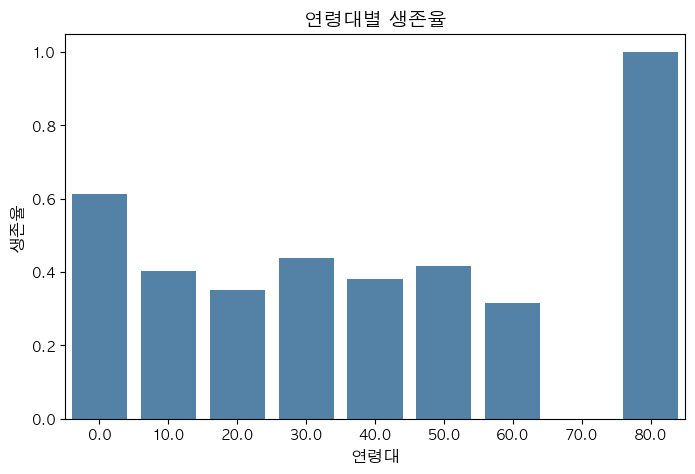

In [23]:
# 10년 단위로 연령대(AgeGroup) 컬럼 생성
train_dt["AgeGroup"] = (train_dt["age"] // 10) * 10  # 0~9, 10~19, 20~29 ...

# 연령대별 생존율 계산
# groupby("AgeGroup")

# AgeGroup(연령대) 별로 데이터를 묶음
# 예: 10대, 20대, 30대 ...
# ["Survived"]

# 생존 여부(Survived) 값만 선택
# .mean()

# 각 연령대별 평균 생존율을 계산

age_group_survival = train_dt.groupby("AgeGroup")["survived"].mean()

# 막대 그래프 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_survival.index.astype(str), 
            y=age_group_survival.values, 
            color="steelblue")

# 제목 및 축 레이블 설정
plt.title("연령대별 생존율", fontsize=14)
plt.xlabel("연령대", fontsize=12)
plt.ylabel("생존율", fontsize=12)

plt.show()

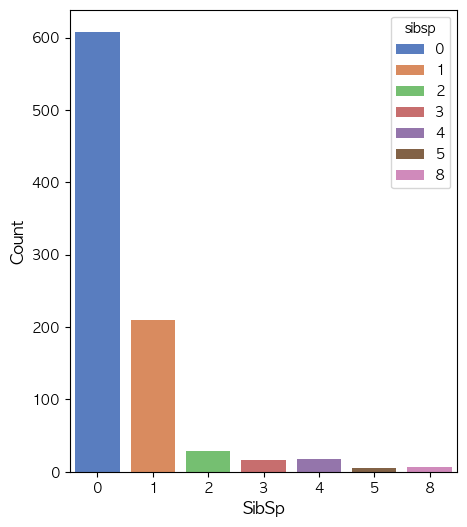

In [24]:
# 그래프 크기 설정
fig, ax = plt.subplots(figsize=(5, 6))

# SibSp 분포를 나타내는 막대 그래프 (Seaborn 기본 색상 사용)
sns.countplot(data=train_dt, x="sibsp", palette="muted", hue="sibsp")

# 제목 및 축 설정
plt.xlabel("SibSp", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

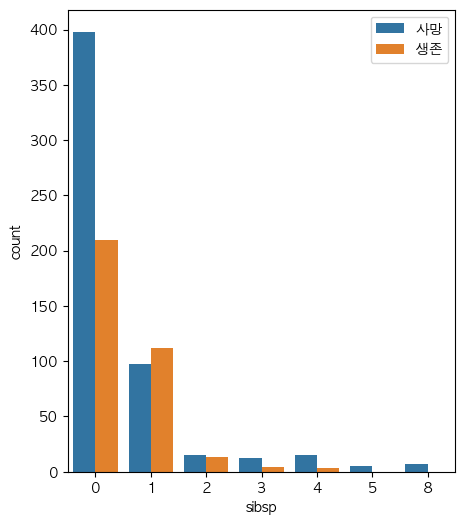

In [25]:
fig, ax = plt.subplots(figsize=(5,6))
 
sns.countplot(data=train_dt, x='sibsp', hue='survived', ax=ax)
 
#범례 한글로 변경
labels=['사망', '생존']
ax.legend(labels=labels)
 
plt.show()

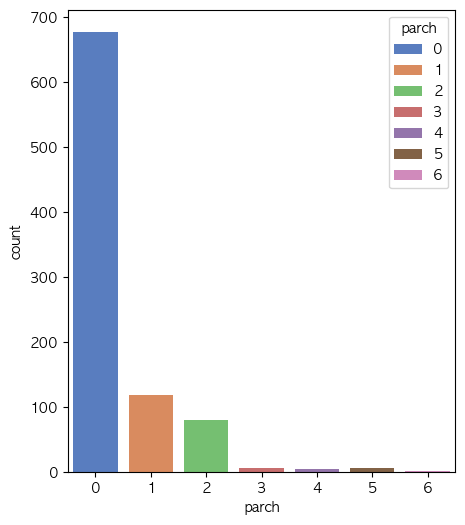

In [26]:
fig, ax = plt.subplots(figsize=(5,6))
 
sns.countplot(data=train_dt, x='parch', palette="muted", hue="parch")
 
plt.show()

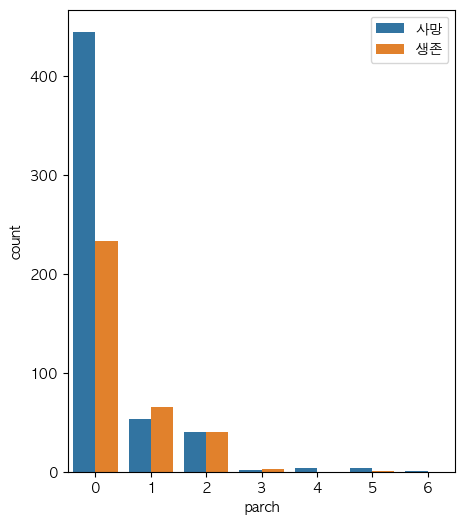

In [27]:
fig, ax = plt.subplots(figsize=(5,6))
 
sns.countplot(data=train_dt, x='parch', hue='survived', ax=ax)
 
#범례 한글로 변경
labels=['사망', '생존']
ax.legend(labels=labels)
 
plt.show()

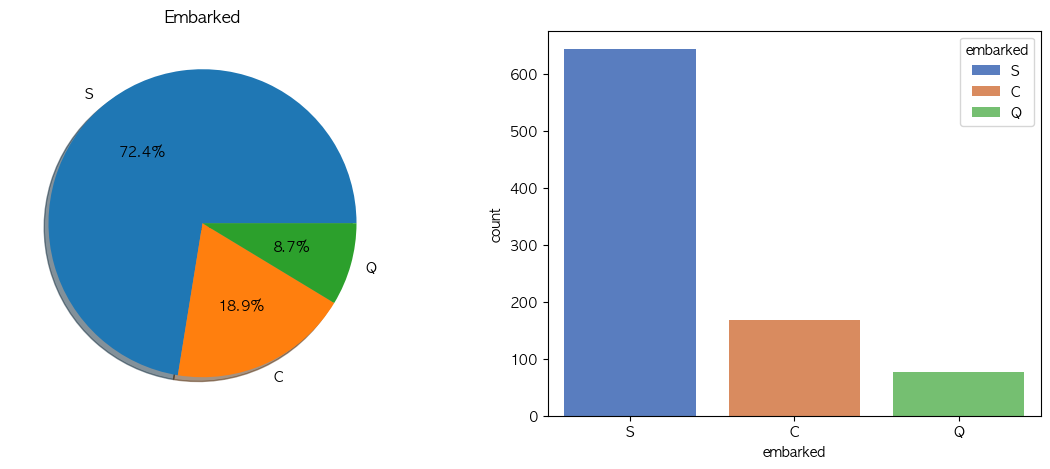

In [28]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
 
train_dt['embarked'].value_counts().plot.pie(ax=ax[0], shadow=True, autopct='%1.1f%%')
ax[0].set(title='Embarked', ylabel='')
 
# sns.countplot(data=train_dt, x='Embarked', palette='muted', ax=ax[1])
sns.countplot(data=train_dt, x='embarked', palette='muted', ax=ax[1], hue="embarked")

plt.show()

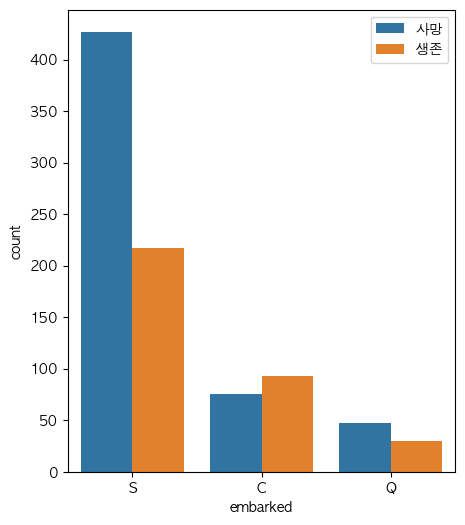

In [29]:
fig, ax = plt.subplots(figsize=(5,6))
 
sns.countplot(data=train_dt, x='embarked', hue='survived', ax=ax)
 
#범례 한글로 변경
labels=['사망', '생존']
ax.legend(labels=labels)
 
plt.show()

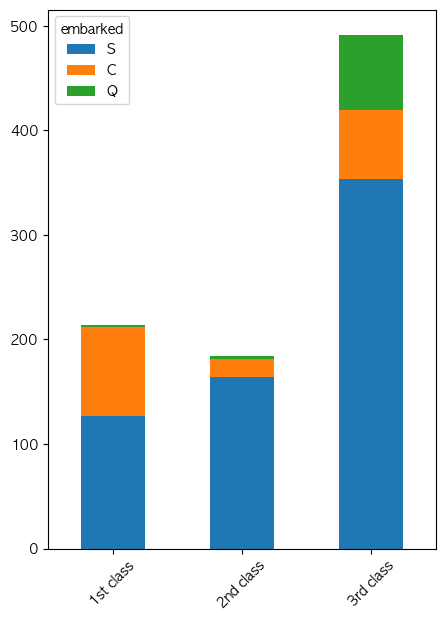

embarked,S,C,Q
1st class,127,85,2
2nd class,164,17,3
3rd class,353,66,72


In [35]:
# Pclass 별로 데이터를 나눔눔
Pclass1 = train_dt[train_dt['pclass']==1]['embarked'].value_counts()
Pclass2 = train_dt[train_dt['pclass']==2]['embarked'].value_counts()
Pclass3 = train_dt[train_dt['pclass']==3]['embarked'].value_counts()
 
fig, ax = plt.subplots(figsize=(5,7))
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind='bar', stacked=True, ax=ax)

# xlabel 회전
plt.xticks(rotation=45)
 
plt.show()

df

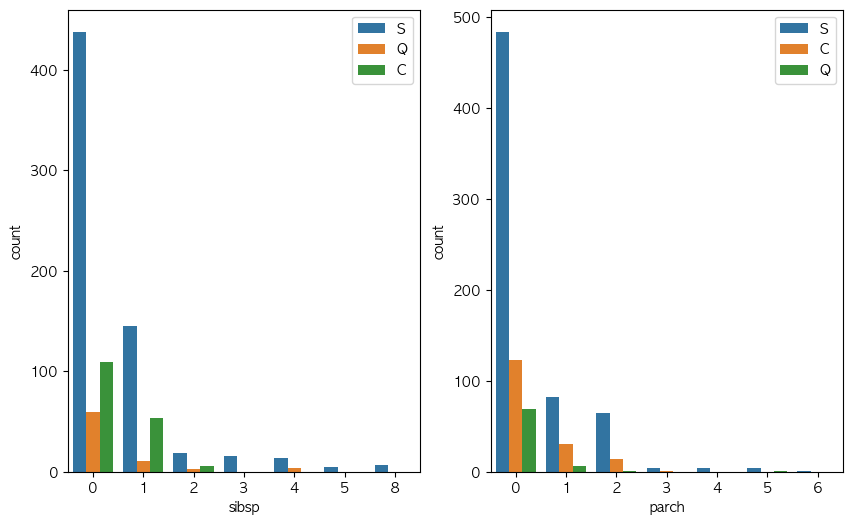

In [36]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
 
sns.countplot(data=train_dt, x='sibsp', hue='embarked', ax=ax[0])
sns.countplot(data=train_dt, x='parch', hue='embarked', ax=ax[1])
 
# 범례 위치조정
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
 
plt.show()

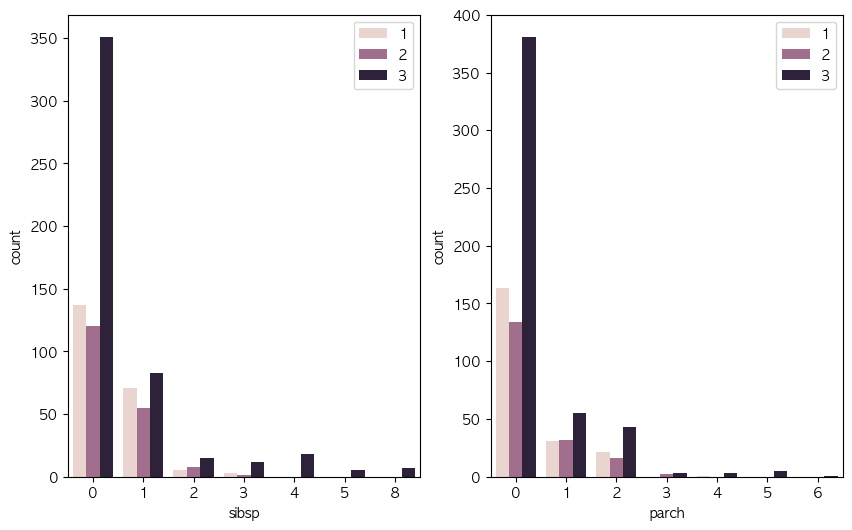

In [37]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
 
sns.countplot(data=train_dt, x='sibsp', hue='pclass', ax=ax[0])
sns.countplot(data=train_dt, x='parch', hue='pclass', ax=ax[1])
 
# 범례 위치조정
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
 
plt.show()

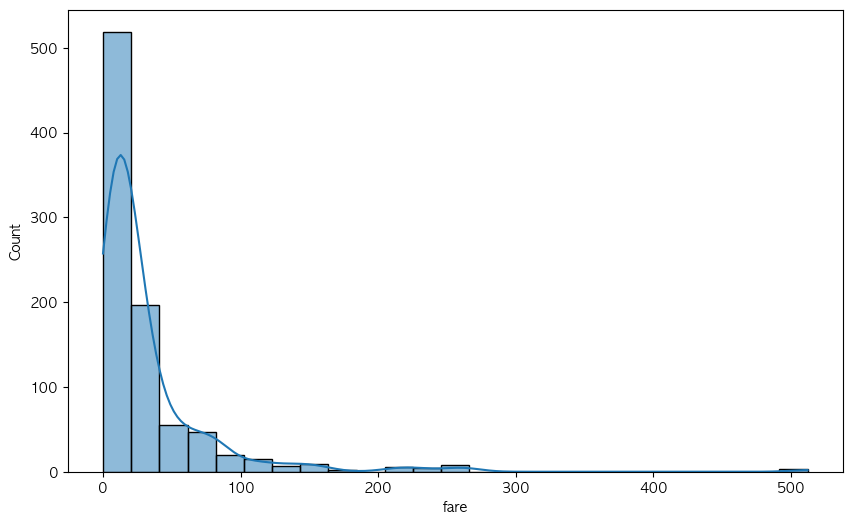

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
 
# 분포확인
sns.histplot(train_dt['fare'], bins=25, kde=True, ax=ax)
 
plt.show()

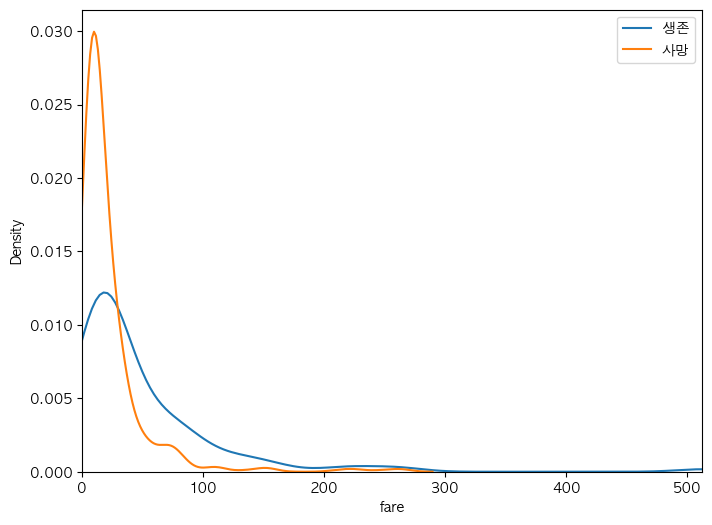

In [39]:
fig, ax = plt.subplots(figsize=(8,6))
 
# 분포 확인
sns.kdeplot(train_dt[train_dt['survived']==1]['fare'], ax=ax)
sns.kdeplot(train_dt[train_dt['survived']==0]['fare'], ax=ax)
 
# 가장 높은 가격까지 범위 확대
ax.set(xlim=(0, train_dt['fare'].max()))
ax.legend(['생존', '사망'])
 
plt.show()